In [1]:
cd /ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/

In [2]:
head AJ_0042_ChIPseq_Chronis_ESCs_Sox2_mm10_sorted.bed

chr1	3010019	3010119	id-2	0.218060
chr1	3010119	3010319	id-3	0.327090
chr1	3010319	3010619	id-4	0.109030
chr1	3010619	3010819	id-5	0.000000
chr1	3010819	3011019	id-6	0.327090
chr1	3011019	3011119	id-7	0.763211
chr1	3011119	3011219	id-8	0.872241
chr1	3011219	3011319	id-9	0.218060
chr1	3011319	3011419	id-10	0.000000
chr1	3011419	3011519	id-11	0.763211


In [3]:
alias bigwig2wig="/staging/leuven/stg_00041/software/bigwig2wig/bigWigToWig"
alias wig2bed="/staging/leuven/stg_00041/software/bedops_v2.4.36/wig2bed"
alias sortbed="/staging/leuven/stg_00041/software/bedops_v2.4.36/sort-bed"
alias bedmap="/staging/leuven/stg_00041/software/bedops_v2.4.36/bedmap"

sort the ATAC bed files by position 

In [15]:
sortbed --max-mem 8G cluster1.bed > cluster1_sorted.bed
sortbed --max-mem 8G cluster2.bed > cluster2_sorted.bed
sortbed --max-mem 8G cluster3.bed > cluster3_sorted.bed
sortbed --max-mem 8G cluster4.bed > cluster4_sorted.bed
sortbed --max-mem 8G cluster5.bed > cluster5_sorted.bed
sortbed --max-mem 8G cluster6.bed > cluster6_sorted.bed
sortbed --max-mem 8G cluster7.bed > cluster7_sorted.bed
sortbed --max-mem 8G cluster8.bed > cluster8_sorted.bed
sortbed --max-mem 8G cluster9.bed > cluster9_sorted.bed
sortbed --max-mem 8G cluster10.bed > cluster10_sorted.bed

Score the enrichment with bedmap sum and mean

In [4]:
for f in `ls -1 *cluster_sorted.bed | sed 's/cluster_sorted.bed//'`; do bedmap --sum ${f}cluster_sorted.bed AJ_0042_ChIPseq_Chronis_ESCs_Sox2_mm10_sorted.bed > ${f}cluster_Sox2_sum.bed; done

### Kernel: R

In [13]:
library(ggplot2)
library(dplyr)
library(readr)

In [14]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/")

In [15]:
# Importing the raw results and storing in variable
cluster1_Sox2_sum <- read_csv("1cluster_Sox2_sum.bed", col_names = FALSE)
cluster2_Sox2_sum <- read_csv("2cluster_Sox2_sum.bed", col_names = FALSE)
cluster3_Sox2_sum <- read_csv("3cluster_Sox2_sum.bed", col_names = FALSE)
cluster4_Sox2_sum <- read_csv("4cluster_Sox2_sum.bed", col_names = FALSE)
cluster5_Sox2_sum <- read_csv("5cluster_Sox2_sum.bed", col_names = FALSE)
cluster6_Sox2_sum <- read_csv("6cluster_Sox2_sum.bed", col_names = FALSE)
cluster7_Sox2_sum <- read_csv("7cluster_Sox2_sum.bed", col_names = FALSE)
cluster8_Sox2_sum <- read_csv("8cluster_Sox2_sum.bed", col_names = FALSE)
cluster9_Sox2_sum <- read_csv("9cluster_Sox2_sum.bed", col_names = FALSE)
cluster10_Sox2_sum <- read_csv("10cluster_Sox2_sum.bed", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)


In [16]:
head(cluster1_Sox2_sum)

X1
1.417391
1.090300
9.158524
1.744481
2.725752
2.180603


In [17]:
cluster1_Sox2_sum <- as.data.frame(cluster1_Sox2_sum)
cluster2_Sox2_sum <- as.data.frame(cluster2_Sox2_sum)
cluster3_Sox2_sum <- as.data.frame(cluster3_Sox2_sum)
cluster4_Sox2_sum <- as.data.frame(cluster4_Sox2_sum)
cluster5_Sox2_sum <- as.data.frame(cluster5_Sox2_sum)
cluster6_Sox2_sum <- as.data.frame(cluster6_Sox2_sum)
cluster7_Sox2_sum <- as.data.frame(cluster7_Sox2_sum)
cluster8_Sox2_sum <- as.data.frame(cluster8_Sox2_sum)
cluster9_Sox2_sum <- as.data.frame(cluster9_Sox2_sum)
cluster10_Sox2_sum <- as.data.frame(cluster10_Sox2_sum)


In [18]:
cluster1_Sox2_sum$cluster <- "C1"
cluster2_Sox2_sum$cluster <- "C2"
cluster3_Sox2_sum$cluster <- "C3"
cluster4_Sox2_sum$cluster <- "C4"
cluster5_Sox2_sum$cluster <- "C5"
cluster6_Sox2_sum$cluster <- "C6"
cluster7_Sox2_sum$cluster <- "C7"
cluster8_Sox2_sum$cluster <- "C8"
cluster9_Sox2_sum$cluster <- "C9"
cluster10_Sox2_sum$cluster <- "C10"

In [19]:
ATACclusters_Sox2_sum_merged <- rbind(cluster1_Sox2_sum,
                                        cluster2_Sox2_sum,
                                        cluster3_Sox2_sum,
                                        cluster4_Sox2_sum,
                                        cluster5_Sox2_sum,
                                        cluster6_Sox2_sum,
                                        cluster7_Sox2_sum,
                                        cluster8_Sox2_sum,
                                        cluster9_Sox2_sum,
                                        cluster10_Sox2_sum)

In [20]:
head(ATACclusters_Sox2_sum_merged)

X1,cluster
1.417391,C1
1.090300,C1
9.158524,C1
1.744481,C1
2.725752,C1
2.180603,C1


In [21]:
ATACclusters_Sox2_sum_merged$cluster <- factor(ATACclusters_Sox2_sum_merged$cluster, levels = c("C6", "C1", "C7","C8","C5","C3","C9","C2","C10","C4"))

In [22]:
Sox2 <- ggplot(ATACclusters_Sox2_sum_merged, aes(x=as.factor(cluster),y=X1, color = cluster))+
  geom_violin(aes(fill = cluster)) +
scale_y_log10()+
scale_fill_brewer(palette="Paired")+
scale_color_brewer(palette = "Paired")+
 # coord_cartesian(ylim=c(0,50))+
geom_point(position = position_jitter(width = .3), alpha = .3, size = 1, color = "black", shape = 1)+
geom_boxplot(width=.2, color = "black", fill = "white")+

theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=14, color = "black"))+
xlab("") +
ylab("sum score")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Sox2")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

In [23]:
options(repr.plot.width=5, repr.plot.height=5)

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 74 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 74 rows containing non-finite values (stat_boxplot)."

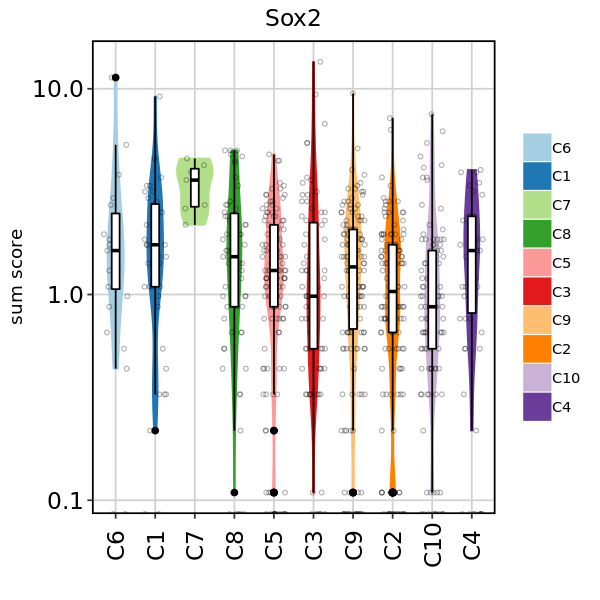

In [24]:
Sox2

In [25]:
ggsave("ATACclusters_Sox2_sum_log10.pdf")

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 74 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 74 rows containing non-finite values (stat_boxplot)."

In [16]:
pairwise.wilcox.test(ATACclusters_Sox2_sum_merged$X1, ATACclusters_Sox2_sum_merged$cluster, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"


	Pairwise comparisons using Wilcoxon rank sum test 

data:  ATACclusters_Sox2_sum_merged$X1 and ATACclusters_Sox2_sum_merged$cluster 

    C6      C1      C7      C8      C5      C3      C9      C2      C10    
C1  0.77052 -       -       -       -       -       -       -       -      
C7  0.00866 0.00504 -       -       -       -       -       -       -      
C8  0.82759 0.52972 0.00446 -       -       -       -       -       -      
C5  0.27973 0.04769 0.00019 0.20388 -       -       -       -       -      
C3  0.13308 0.03892 0.00086 0.11667 0.44108 -       -       -       -      
C9  0.26878 0.05284 0.00017 0.18671 0.91256 0.56409 -       -       -      
C2  0.03895 0.00171 5.5e-05 0.00863 0.05130 0.37584 0.05910 -       -      
C10 0.02334 0.00220 0.00019 0.00642 0.03081 0.32601 0.04348 0.74447 -      
C4  0.41128 0.18469 0.00076 0.32895 0.99097 0.72649 0.95628 0.24350 0.23046

P value adjustment method: none 